In [28]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier  
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support, roc_auc_score, roc_curve, confusion_matrix
from deap import base, creator, tools, algorithms
import shap
import random
from sklearn.utils import shuffle

In [2]:
# Step 2: Load the dataset
file_path = 'Banking data.xlsx'
xls = pd.ExcelFile(file_path)
df = pd.read_excel(file_path, sheet_name='bank-full')

In [3]:
# Step 3: Display the first few rows of the dataset to understand its structure
df.head(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
# Step 4: Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# Step 5: Display summary statistics for numerical columns
summary_stats = df.describe()
print(summary_stats)

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

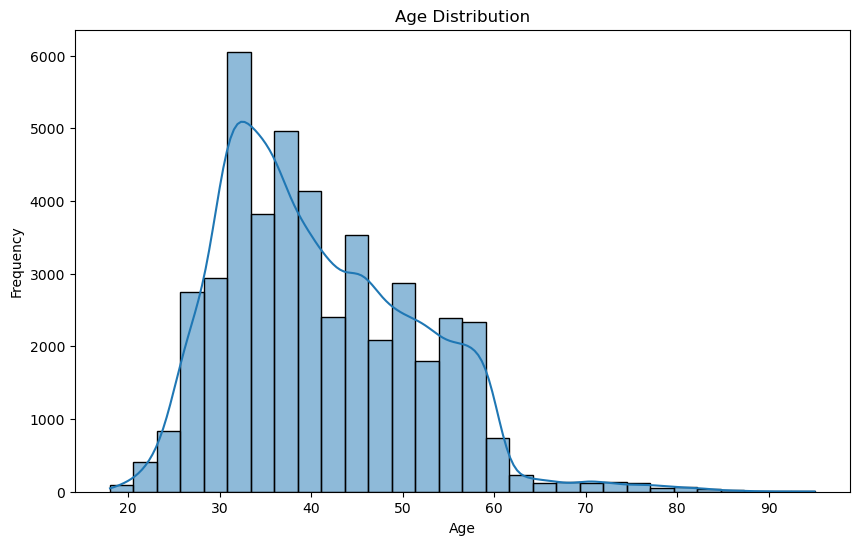

In [6]:
# Step 7: Plotting the distribution of 'age'
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

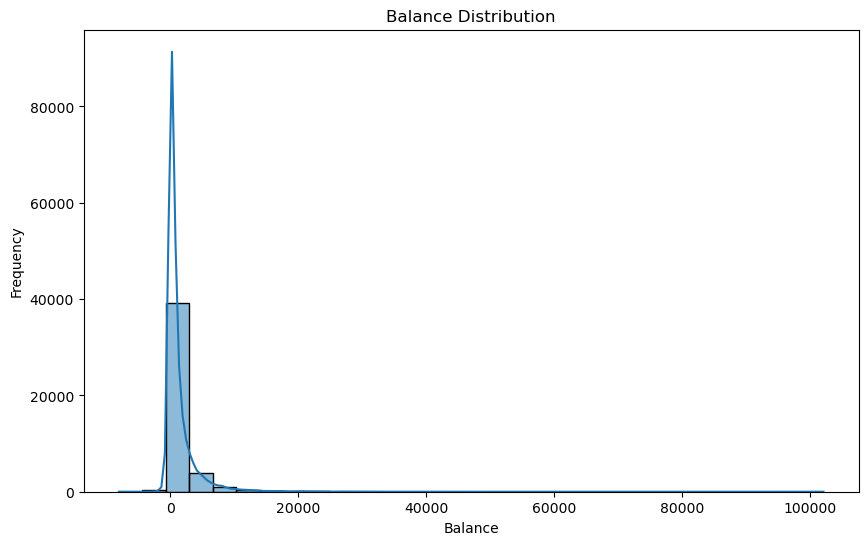

In [7]:
# Step 8: Checking the distribution of 'balance'
plt.figure(figsize=(10, 6))
sns.histplot(df['balance'], kde=True, bins=30)
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

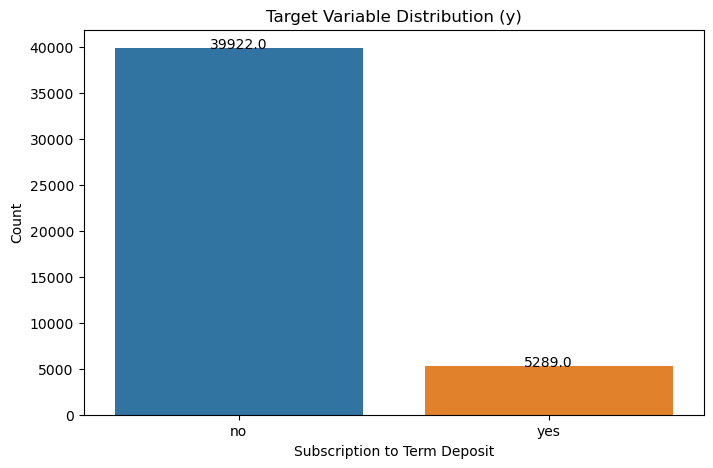

In [8]:
# Step 9: Count plot for the target variable 'y'
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='y', data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.title('Target Variable Distribution (y)')
plt.xlabel('Subscription to Term Deposit')
plt.ylabel('Count')
plt.show()

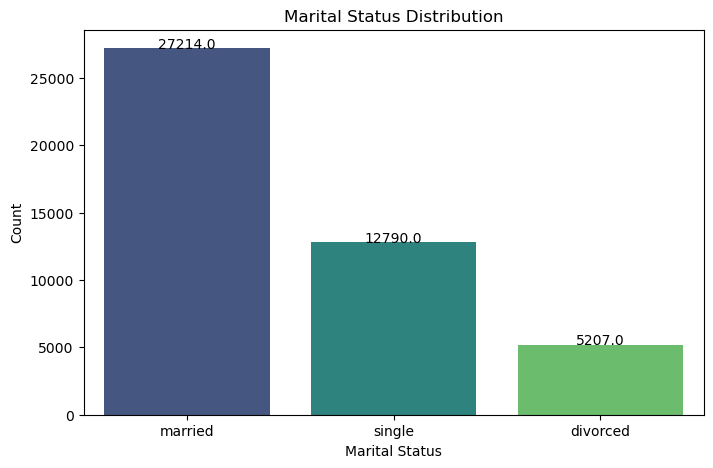

In [9]:
# Step 10: Count plot for marital status
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='marital', data=df, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

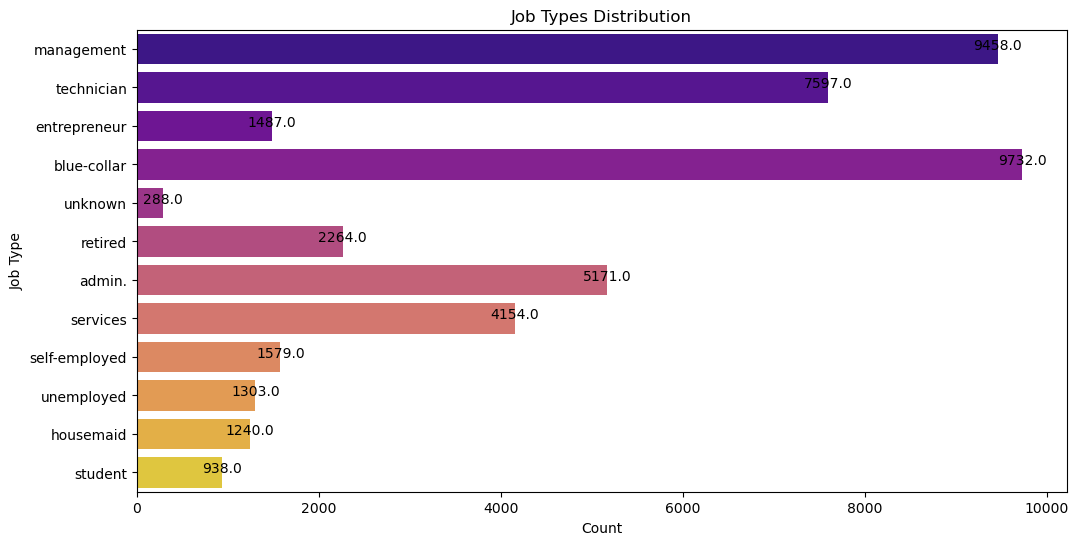

In [10]:
# Step 11: Count plot for job types
plt.figure(figsize=(12, 6))
ax = sns.countplot(y='job', data=df, palette='plasma')
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', va='baseline')
plt.title('Job Types Distribution')
plt.xlabel('Count')
plt.ylabel('Job Type')
plt.show()

In [11]:
# Step 12: Encode categorical variables for correlation analysis
le = LabelEncoder()
df_encoded = df.copy()
categorical_cols = df_encoded.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

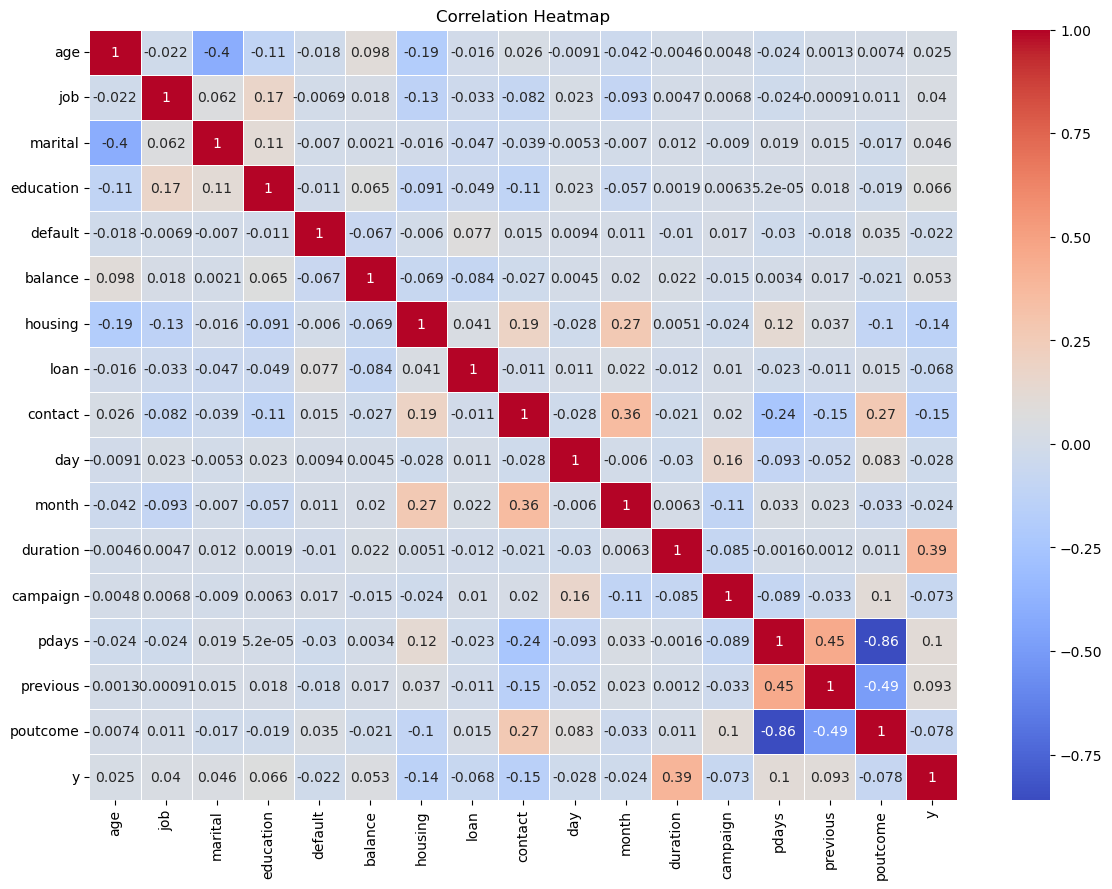

In [12]:
# Step 13: Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Step 14: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [13]:
# Step 15: Prepare features (X) and target variable (y) for feature selection
X = df_encoded.drop(columns=['y'])
y = df_encoded['y']

# Step 16: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Step 17: Apply SelectKBest to select the top 10 features based on the ANOVA F-value test
select_k_best = SelectKBest(score_func=f_classif, k=10)
fit = select_k_best.fit(X, y)

# Step 18: Create a DataFrame to view feature scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': fit.scores_})
selected_features = feature_scores.sort_values(by='Score', ascending=False).head(10)

# Step 19: Display the top 10 features
print(selected_features)

      Feature        Score
11   duration  8333.761148
8     contact  1017.965930
6     housing   892.950576
13      pdays   490.696563
14   previous   396.443989
15   poutcome   275.596872
12   campaign   243.358404
7        loan   211.167395
3   education   199.242825
5     balance   126.572276


In [15]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Baseline Models: Logistic Regression and Decision Tree
baseline_models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Decision Tree': DecisionTreeClassifier()
}

In [42]:
# Advanced Models: Random Forest, XGBoost, Gradient Boosting, GA-XGBoost
advanced_models = {
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'XGBoost': XGBClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100)
}

In [25]:
all_models = {**baseline_models, **advanced_models}

In [29]:
# Cross-validation and evaluation for all models
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'AUC': []}
roc_curves = {}
confusion_matrices = {}

In [30]:
for model_name, model in all_models.items():
    print(f'\nEvaluating Model: {model_name}...')
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    print(f'Mean Cross-Validation Accuracy: {np.mean(scores):.4f}')

    # Train the model on entire training data
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    auc = roc_auc_score(y_test, y_pred)
    
    print(f'Accuracy on Test Set: {accuracy:.4f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    # Save metrics for comparison
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1-Score'].append(f1)
    metrics['AUC'].append(auc)
    
    # ROC Curve
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_curves[model_name] = (fpr, tpr, auc)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[model_name] = cm


Evaluating Model: Logistic Regression...


C:\Users\saigo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\saigo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Mean Cross-Validation Accuracy: 0.8902


C:\Users\saigo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on Test Set: 0.8846
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.57      0.19      0.28      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.58      0.61      9043
weighted avg       0.86      0.88      0.86      9043


Evaluating Model: Decision Tree...
Mean Cross-Validation Accuracy: 0.8718
Accuracy on Test Set: 0.8748
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.48      0.48      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.71      0.71      0.71      9043
weighted avg       0.88      0.87      0.87      9043


Evaluating Model: Random Forest...
Mean Cross-Validation Accuracy: 0.9058
Accuracy on Test Set: 0.9011
Classification Report:
              precision    recall  f1-sc

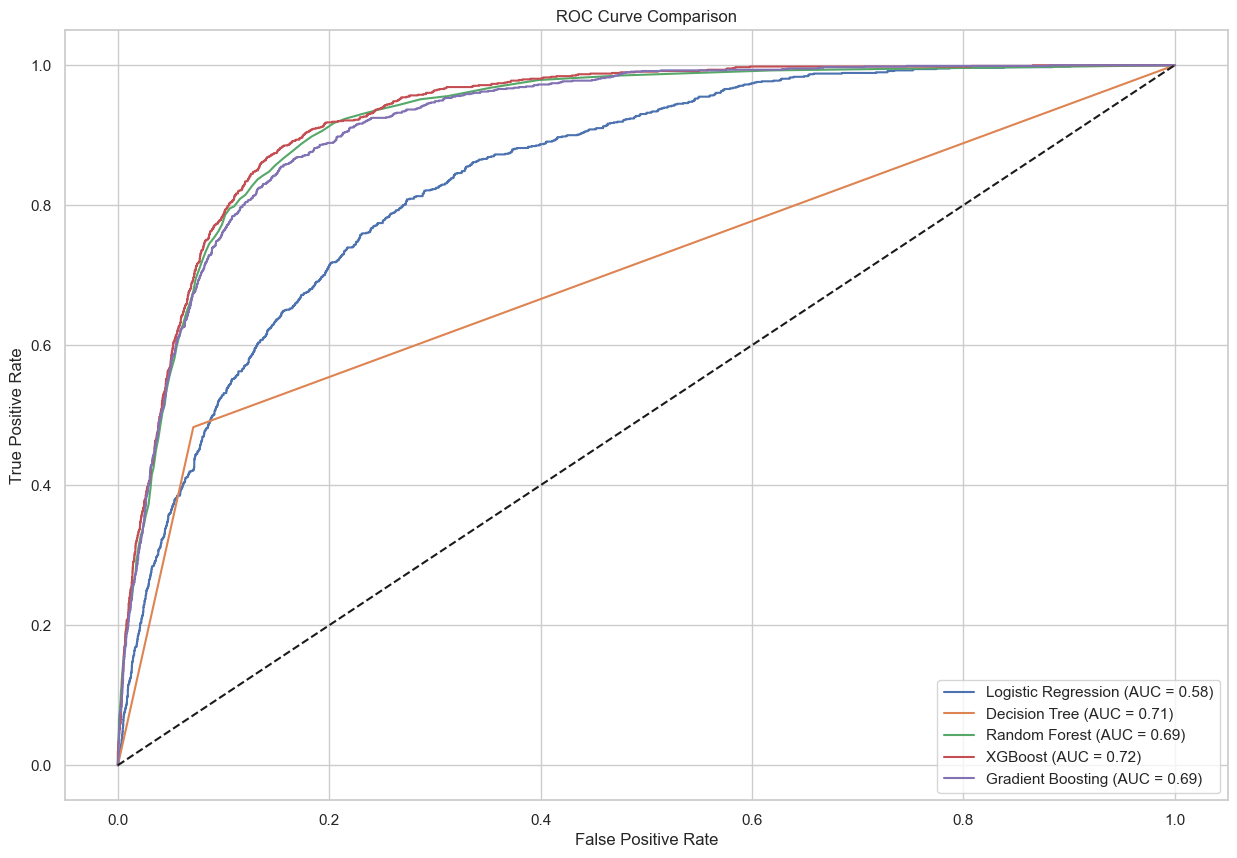

In [44]:
# Finalize ROC Curve plot
plt.figure(figsize=(15, 10))
for model_name, (fpr, tpr, auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

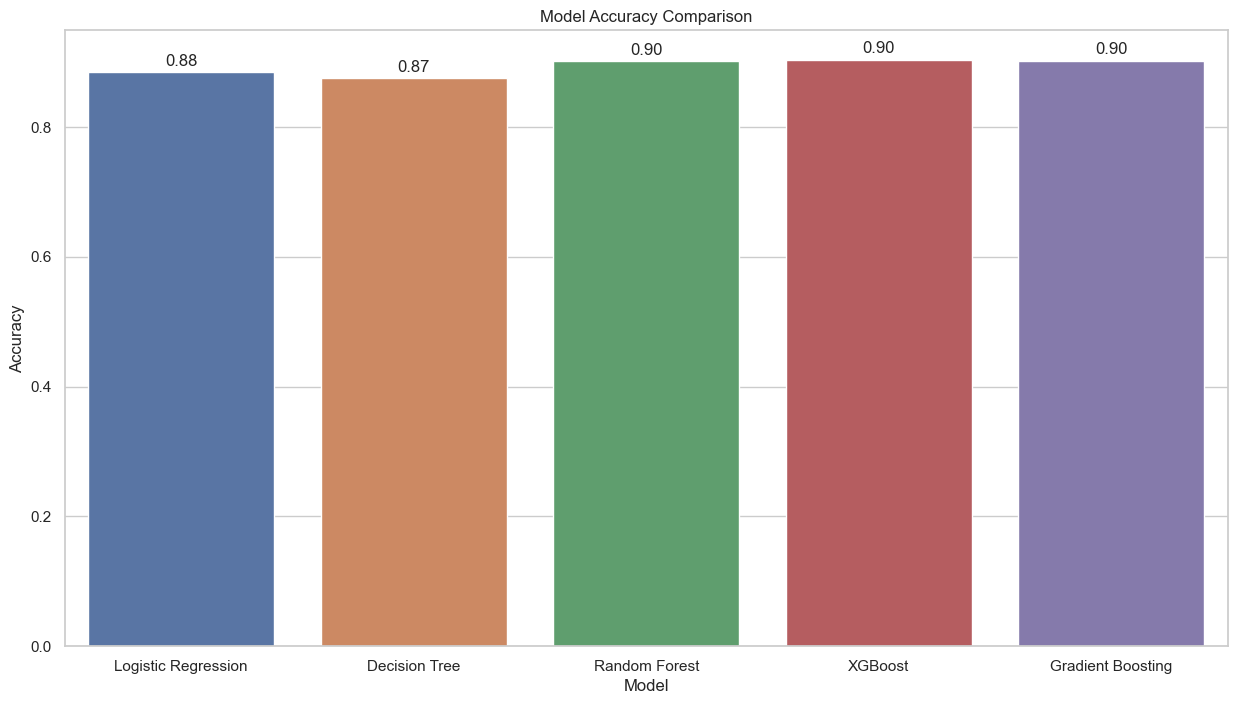

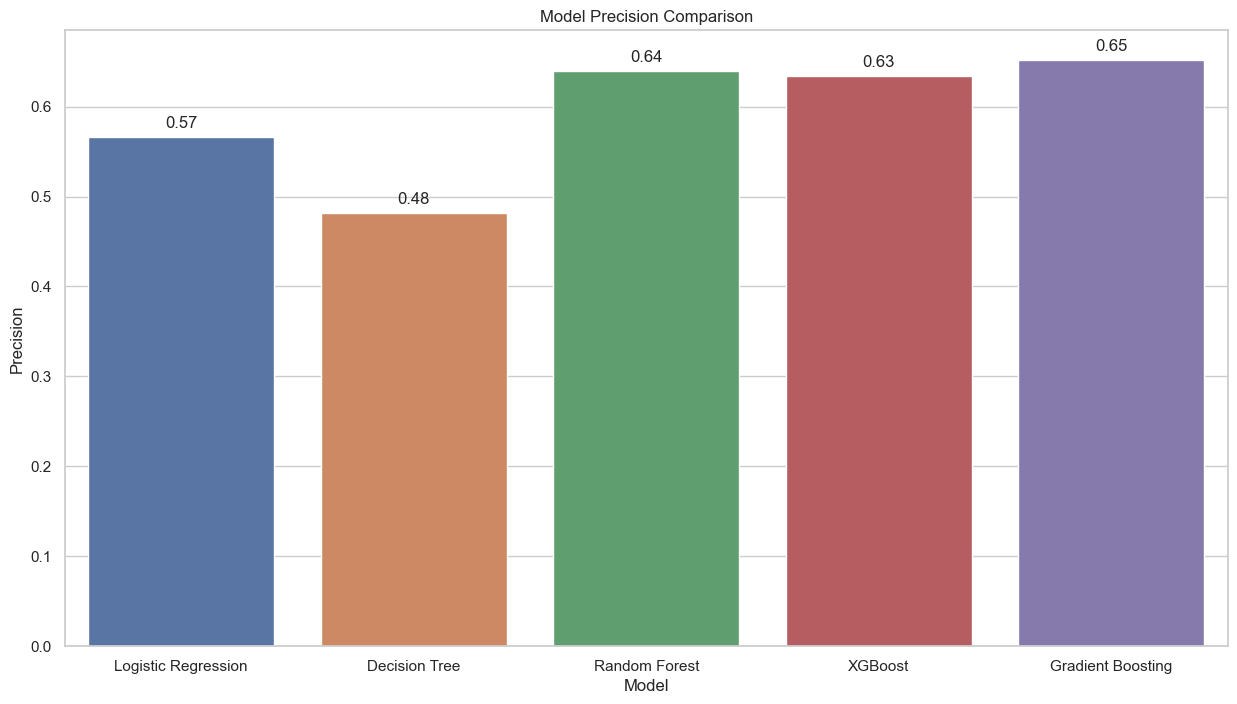

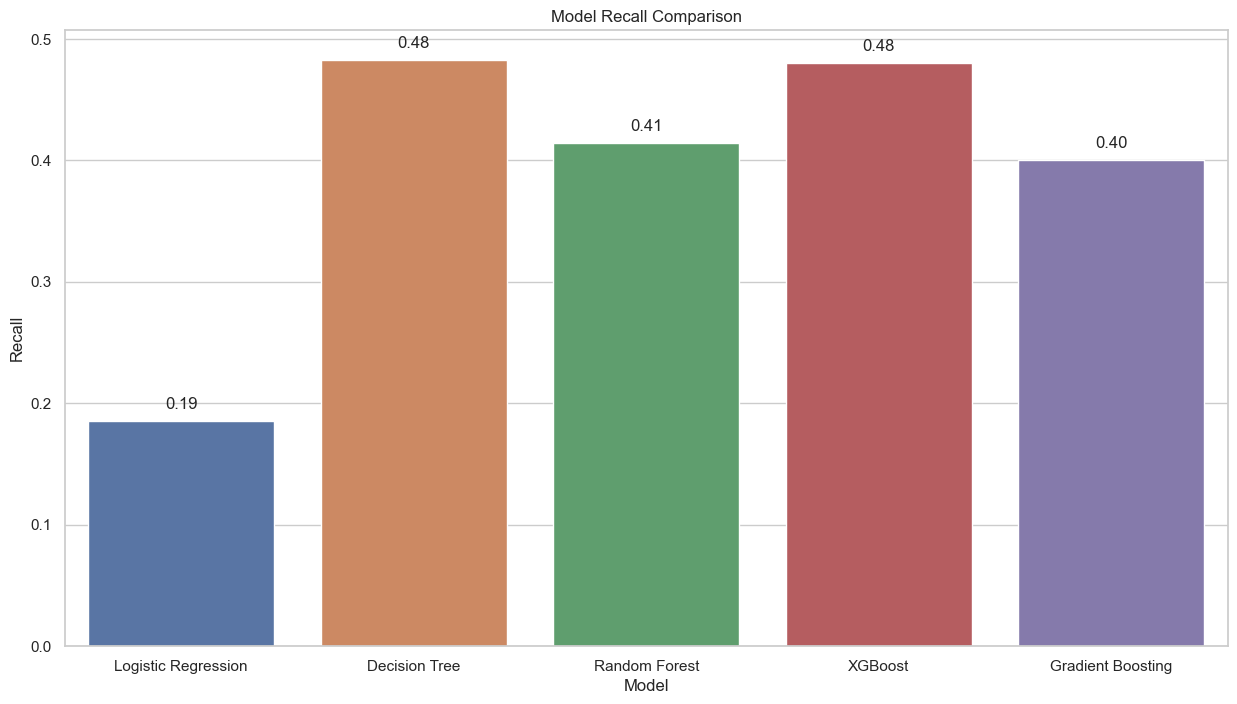

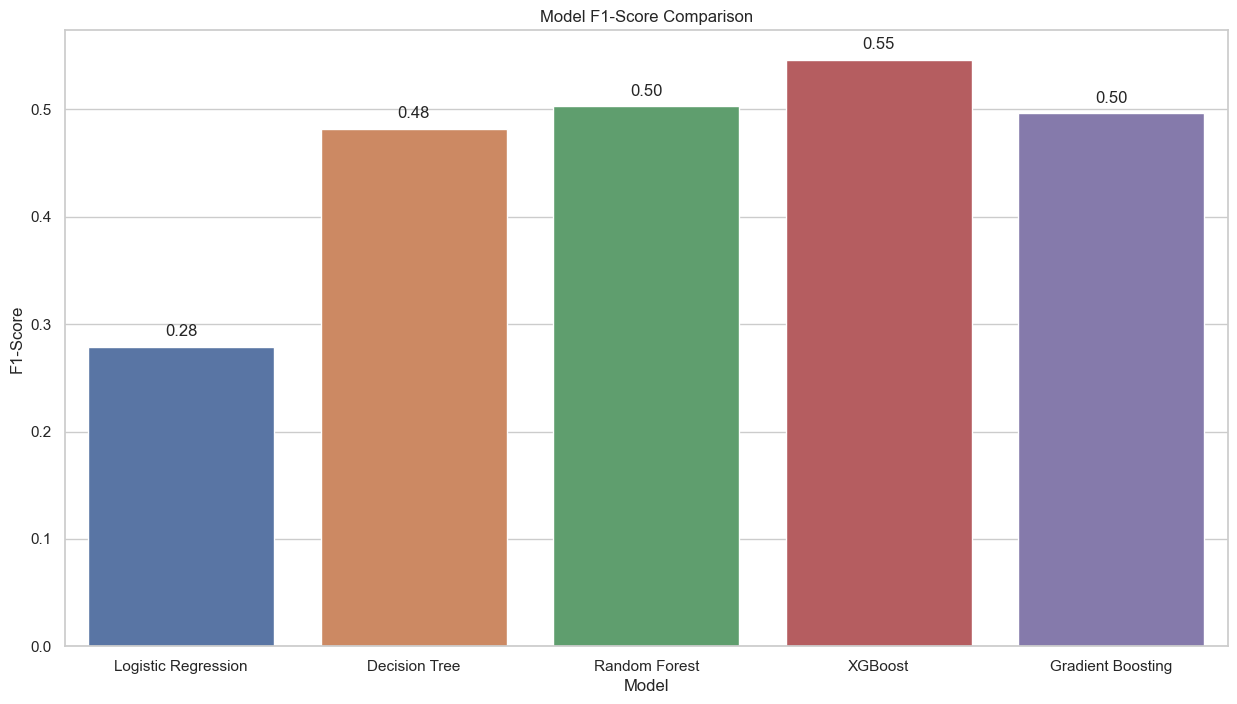

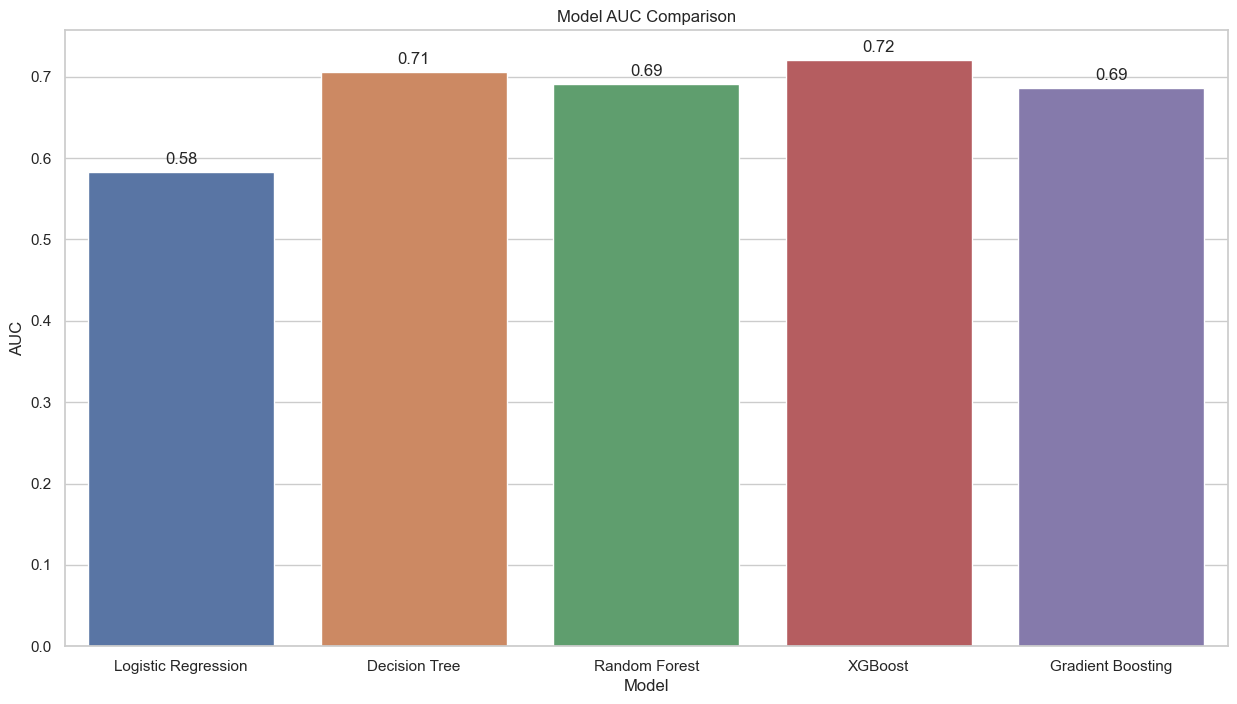

In [50]:
# Plot metrics comparison
metrics_df = pd.DataFrame(metrics)
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))
sns.barplot(x='Model', y='Accuracy', data=metrics_df)
for index, value in enumerate(metrics_df['Accuracy']):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center')
plt.title('Model Accuracy Comparison')
plt.savefig("ModelAccuracy.png")
plt.show()


plt.figure(figsize=(15, 8))
sns.barplot(x='Model', y='Precision', data=metrics_df)
for index, value in enumerate(metrics_df['Precision']):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center')
plt.title('Model Precision Comparison')
plt.savefig("ModelPrecision.png")
plt.show()


plt.figure(figsize=(15, 8))
sns.barplot(x='Model', y='Recall', data=metrics_df)
for index, value in enumerate(metrics_df['Recall']):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center')
plt.title('Model Recall Comparison')
plt.savefig("ModelRecall.png")
plt.show()


plt.figure(figsize=(15, 8))
sns.barplot(x='Model', y='F1-Score', data=metrics_df)
for index, value in enumerate(metrics_df['F1-Score']):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center')
plt.title('Model F1-Score Comparison')
plt.savefig("ModelF1Score.png")
plt.show()


plt.figure(figsize=(15, 8))
sns.barplot(x='Model', y='AUC', data=metrics_df)
for index, value in enumerate(metrics_df['AUC']):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center')
plt.title('Model AUC Comparison')
plt.savefig("ModelAUC.png")
plt.show()

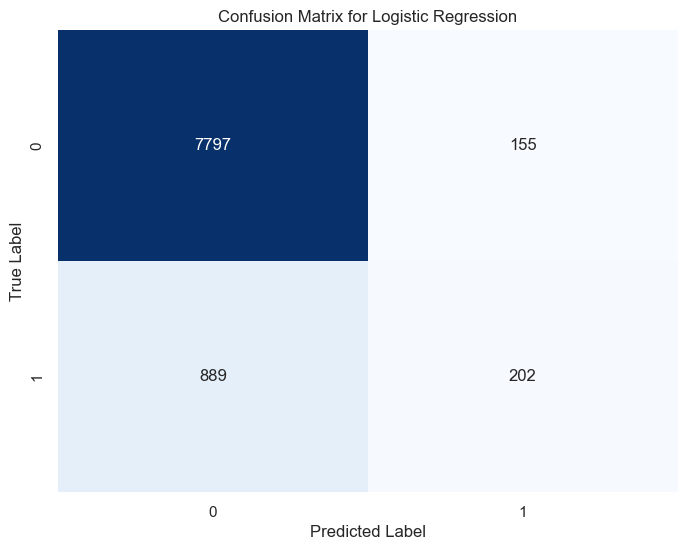

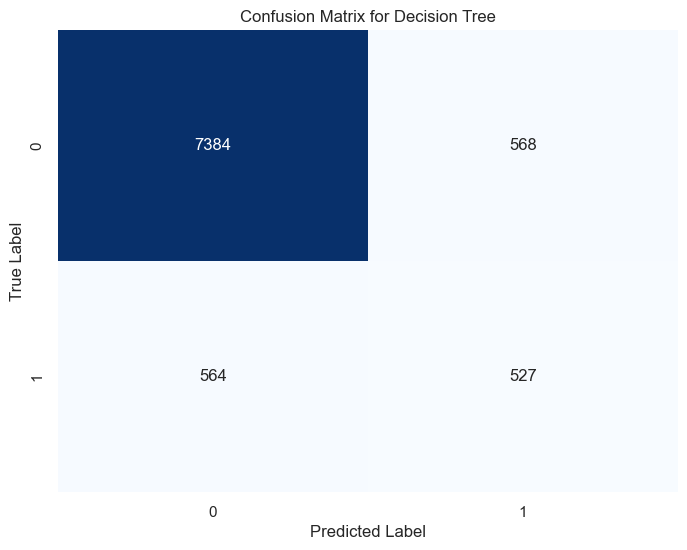

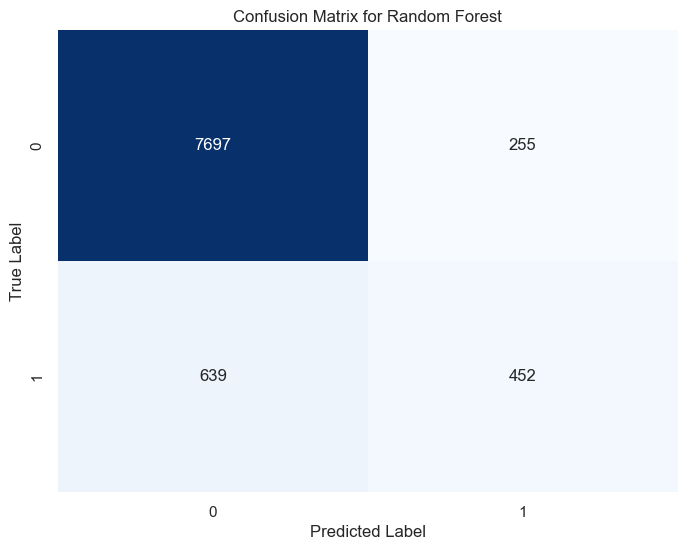

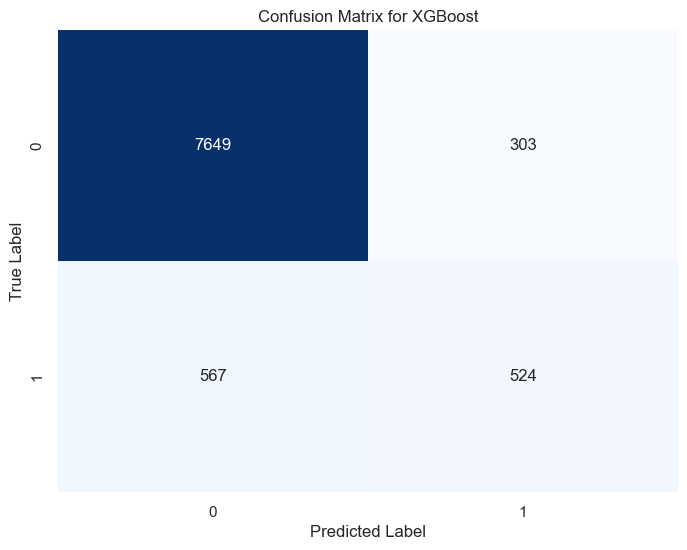

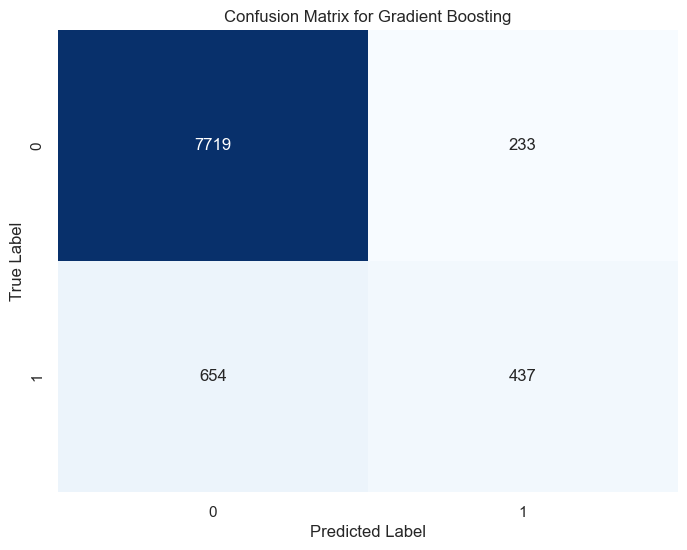

In [51]:
# Confusion Matrix for all models
for model_name, cm in confusion_matrices.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.savefig("ConfusionMatrix.png")
    plt.show()


Explaining Model: Random Forest with SHAP values...


100%|===================| 18065/18086 [12:47<00:00]        C:\Users\saigo\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning: The figure layout has changed to tight
  pl.tight_layout()
C:\Users\saigo\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:624: UserWarning: The figure layout has changed to tight
  pl.tight_layout(pad=0, w_pad=0, h_pad=0.0)


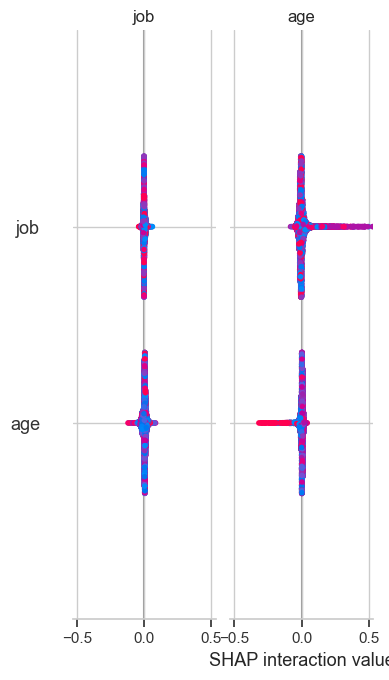


Explaining Model: XGBoost with SHAP values...


 98%|===================| 8874/9043 [00:44<00:00]        

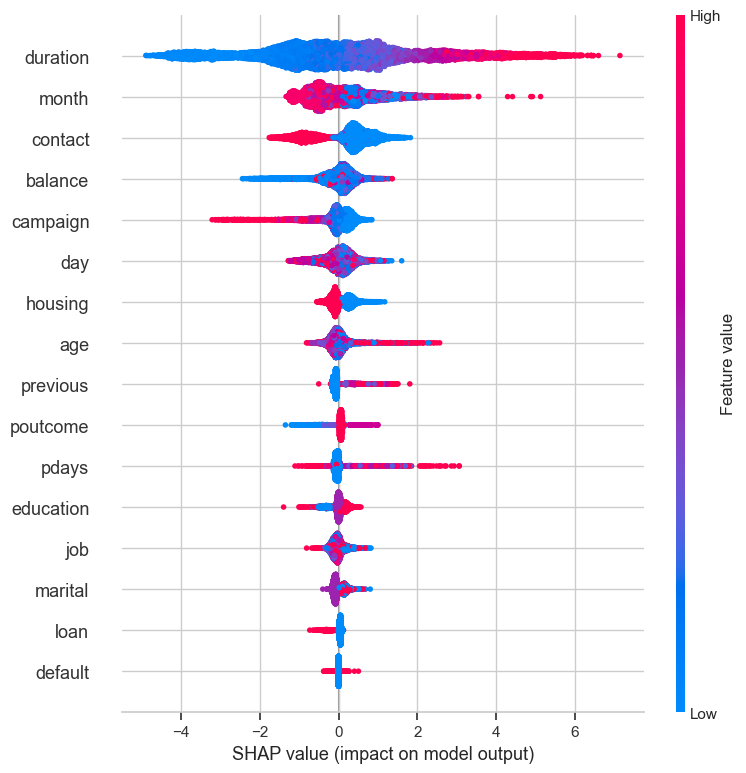


Explaining Model: Gradient Boosting with SHAP values...


 98%|===================| 8887/9043 [00:15<00:00]        

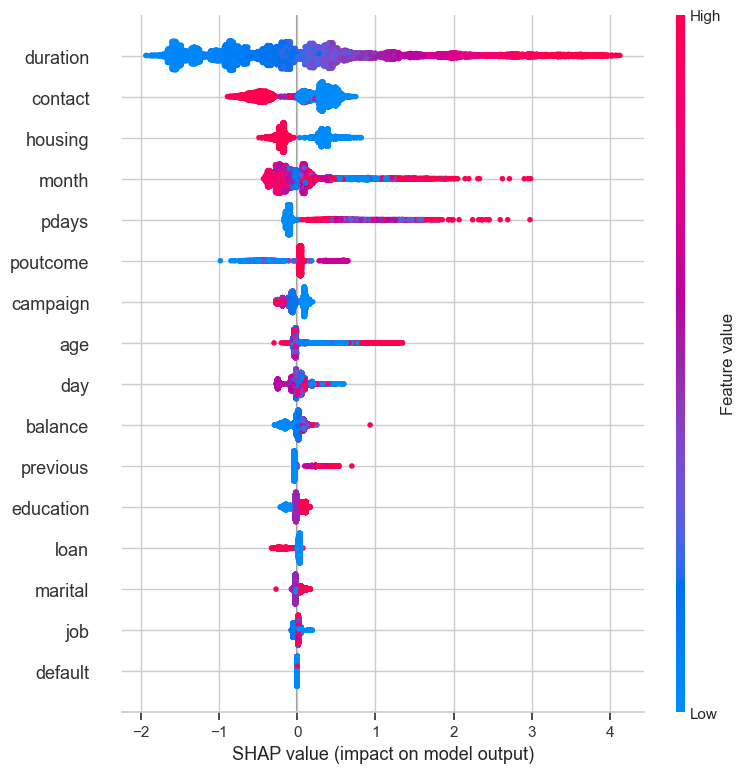

In [38]:
# SHAP values for interpretability
for model_name, model in advanced_models.items():
    print(f'\nExplaining Model: {model_name} with SHAP values...')
    explainer = shap.Explainer(model, X_train)
    shap_values = explainer(X_test)
    shap.summary_plot(shap_values.values if hasattr(shap_values, 'values') else shap_values, X_test)